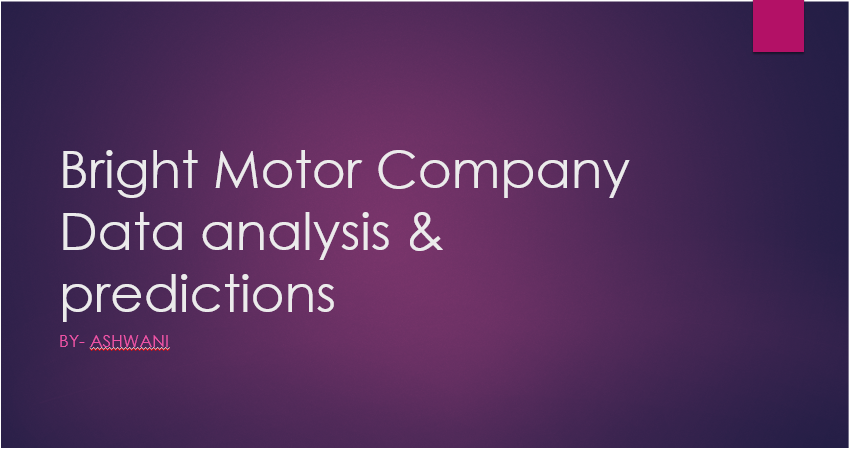

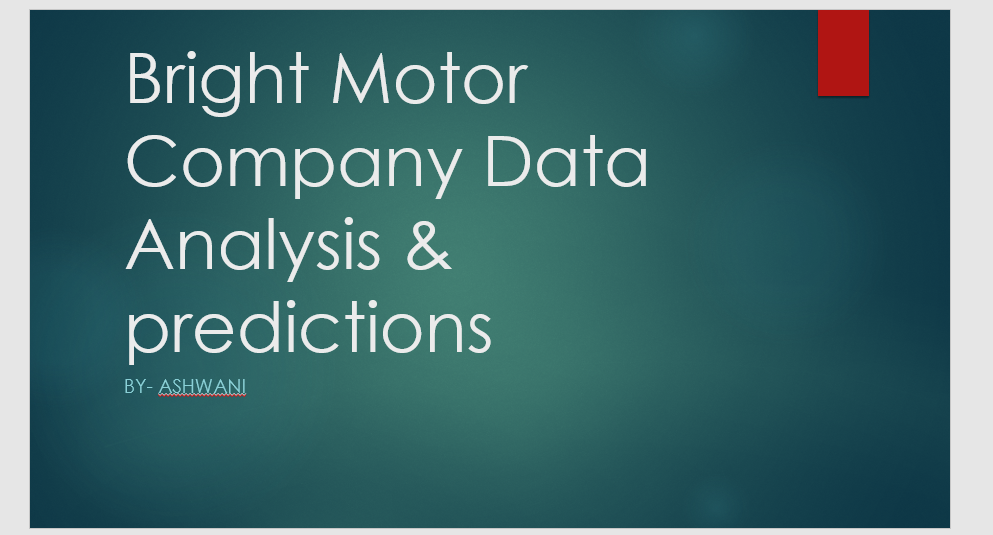

# Index
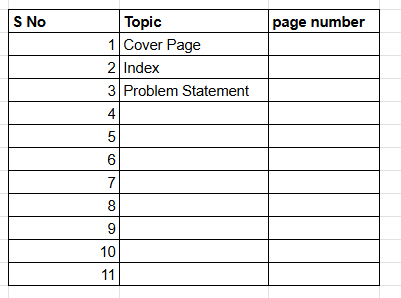


## Problem Statement:
Predicting Customer Purchase Behavior for Bright Motor Company
## Business Context:
Bright Motor Company is looking to optimize its sales strategy by understanding the profiles of individuals likely to purchase their vehicles. They also want to price their products more effectively based on the customer’s profile and financial background.

The company has collected data from previous inquiries and purchases, which includes demographic, professional, and financial attributes of individuals who interacted with their dealership. This information will be used to analyze customer behavior, predict the likelihood of a purchase, and estimate the optimal product pricing strategy.
## Project Objective:
Your objective is to help Bright Motor Company with the following:

1. Exploratory Data Analysis (EDA):
* Understand the structure of the data.
* Identify trends and relationships between customer characteristics and purchase behavior.
* Find potential data quality issues (missing values, outliers, etc.)
* Visualize how salary, profession, education, and other factors relate to car buying behavior.

2. Classification Task (Binary Classification):
* Problem: Predict whether a customer will purchase a car or not (you may use the Make or create a derived binary target like Will_Purchase = 1 if Make is not null).
* Goal: Build and evaluate classification models (e.g., Logistic Regression, Decision Trees, Random Forest, etc.) to predict customer purchase decisions based on demographic and financial features.

3. Regression Task (Predictive Modeling):
* Problem: Predict the Price of the car purchased by the customer based on their demographic and financial profile.
* Goal: Build regression models (e.g., Linear Regression, Decision Tree Regressor, etc.) to estimate the appropriate price point for a customer.

4. Model Evaluation:
* Use appropriate metrics like:
* Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC
* Regression: RMSE, MAE, R²
* Perform cross-validation and hyperparameter tuning where applicable.

5. Model Deployment (Optional if time permits):
* Deploy the classification and regression models using Flask/Streamlit to demonstrate how Bright Motor Company can use this model in real-time.
* Create a basic UI where the company can input customer data and receive purchase predictions and recommended price.

---

*By-* **Mowlick Armstrong**

#### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [ ]:
df = pd.read_csv('bright_automotive_company.csv')

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [ ]:
df.head()

###### Observations:
1. There are some values in Gender which are required to be corrected.
2. In the feature No_of_Dependents we are having wrong entries like "?".
3.

#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [ ]:
df.shape

###### Result:
There are _ rows and _ columns in dataset

#### 1.3 Checking the info of dataset

In [ ]:
df.info()

###### Observations:
1.

In [ ]:
df[df['Age']>60]

#### 1.4 Statistical summary

###### Observations:
* 1- Partners of few customers may be home maker and not doing jobs.
* 2- We need to check the record where age is 120.
* 3- We need to check the record where age is 14.

In [ ]:
#1
# Check how many partners are not working
not_working = df[df['Partner_working'] == 'No']

# Display summary
print(f"Total partners not working: {len(not_working)}")
print(not_working[['Age', 'Gender', 'Partner_working', 'Partner_salary']].head())

# Check if Partner_salary is 0 or NaN for non-working partners
not_working_salary = not_working[['Partner_salary']].isna().sum()
print(f"Missing partner salaries for non-working partners: {not_working_salary.values[0]}")

In [ ]:
#2
df_age_120 = df[df['Age'] == 120]
print(f"Records with age 120: {len(df_age_120)}")
print(df_age_120)

In [ ]:
#3
df_age_14 = df[df['Age'] == 14]
print(f"Records with age 14: {len(df_age_14)}")
print(df_age_14)

## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows

In [ ]:
# total number of duplicate rows
df.duplicated().sum()

In [ ]:
# Fetching duplicate rows
df[df.duplicated()]

### 2.2 Checking Null Values

In [ ]:
# Column-wise null values
df.isnull().sum()

In [ ]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

In [ ]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

###### Results:


### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [ ]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

##### 2.3.1 Visualizing outliers

In [ ]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


###### Observations:
1.
2.

##### 2.3.2 Finding the no. of outliers in each column

In [ ]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

###### Results:
1.
2.

### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables vizual analysis:

In [ ]:
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(data=df, x=i)
    plt.show()

##### 2.4.2. Categorical variables numerical analysis:

In [ ]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

###### Observations:
1.
2.

##### 2.4.3. Numerical variables analysis:

In [ ]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i);

###### Observations:
1.

### 2.5 Bi-variate analysis
* Since during model building we will be having "Price" and "Make" as our target variables so we will only do bi-variate analysis of these features only.

####  2.5.1. Relationship of  'Price' with Categorical features
* Few plots which we can use are:
    * Boxplot
    * Scatterplot
    * Barplot
    * Pointplot

##### 2.5.1.1. Numerical analysis:

In [ ]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['Price'].mean())
    print('--------------------')

##### 2.5.1.2. Visual analysis:

In [ ]:
# barplots for Price vs all other categorical variables
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, y='Price',x=i,errorbar=None);

###### Observation:
1- Price vs Gender- Avg price of cars is hifh for females as compared to males
2-

In [ ]:
gender_avg_price = df.groupby("Gender")["Price"].mean()
print(gender_avg_price)

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Price", data=df, estimator=np.mean)
plt.title("Average Car Price by Gender")
plt.ylabel("Average Price")
plt.show()

####  2.5.2. Relationship of  'Price' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

In [ ]:
# 1-Pairplot
import seaborn as sns

sns.pairplot(df[['Price', 'Age', 'Salary', 'Partner_salary', 'Total_salary']], diag_kind='kde')
plt.suptitle("Pairplot: Relationships Between Salary, Age, and Price", y=1.02)
plt.show()


In [ ]:
#2 Jointplot
# Salary vs Price
sns.jointplot(data=df, x="Salary", y="Price", kind="scatter", hue="Gender")
plt.suptitle("Jointplot: Salary vs Price", y=1.02)
plt.show()
# Total Salary vs Price (with regression line)
sns.jointplot(data=df, x="Total_salary", y="Price", kind="reg")
plt.suptitle("Jointplot: Total Salary vs Price with Regression", y=1.02)
plt.show()

In [ ]:
#3 Scatterplot
# Salary vs Price with Gender hue
sns.scatterplot(data=df, x="Salary", y="Price", hue="Gender")
plt.title("Scatterplot: Salary vs Price by Gender")
plt.show()
# Age vs Price with Personal Loan
sns.scatterplot(data=df, x="Age", y="Price", hue="Personal_loan", style="Gender")
plt.title("Scatterplot: Age vs Price by Loan and Gender")
plt.show()

In [ ]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='Price',x=i);

##### Observations:
We cannot observe any pattern in the scatterplots which shows that there might be no correlation between price and any other numerical feature

##### Checking the correlation with heatmap to check above observation

In [ ]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

##### Results:
1.

####  2.5.3 Relationship of  'Make' with all other features
* We can use following plots & tables :
    * Countplot with hue
    * crosstab
    * df.plot.bar(stacked=True)

##### 2.5.3.1 Visual analysis of "Make" with other categorical variables
    

In [ ]:
for i in cat_variables.columns:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df, x=i, hue='Make');

###### Observations;
1.

##### 2.5.3.2 Numerical analysis of "Make" with other categorical variables

In [ ]:
for i in cat_variables:
    print(pd.crosstab(df['Make'],df[i]))
    print('------------------------------')

###### Observations:

##### 2.5.3.3 Visual analysis of "Make" with other numerical variables
Use any of these plots
* 1.Boxplot
* 2.Scatterplot
* 3.Barplot
* 4.Pointplot

In [ ]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, x='Make', y=i,errorbar= None);

###### Observations

##### 2.5.3.4 Numerical analysis of "Make" with other numerical variables

In [ ]:
for i in num_variables.columns:
    print(i)
    print(df.groupby('Make')[i].mean())
    print('--------------------')

##### Observations:
1.

# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('bright_automotive_company.csv')

In [ ]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.1 Dropping duplicates

In [ ]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

#### 3.2 Replacing wrong entries

##### 3.2.1 Gender

In [ ]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

In [ ]:
# Replacing wrong entries
df_copy['Gender']=df_copy['Gender'].replace(['Femal','Femle'],'Female')

In [ ]:
# After Cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

##### 3.2.2 Make

In [ ]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

In [ ]:
# Fetching the records where Make is "?"
df_copy[df_copy['Make']=='?']

In [ ]:
df_copy['Make']=df_copy['Make'].replace('?',df_copy['Make'].mode()[0])

In [ ]:
# After Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

###### How to replace two same wrong entries with two seperate values

In [ ]:
df_copy['Make'].value_counts()

In [ ]:
df_copy[df_copy['Make']=='?']

In [ ]:
df_copy.iat[3,13]= 'Sedan'

In [ ]:
df_copy.iat[14,13]='Hatchback'

##### 3.2.3 Replacing wrong entries in No_of_Dependents

In [ ]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['No_of_Dependents'].unique())
print("Number of Unique categories in feature : ",df_copy['No_of_Dependents'].nunique())
print("Count of Unique categories in feature : ",df_copy['No_of_Dependents'].value_counts())

In [ ]:
# Fetching the rows with wrong entries
df_copy[df_copy['No_of_Dependents']=='?']

In [ ]:
# Replace '?' with NaN
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].replace('?', np.nan)

# Drop unwanted rows
df_copy = df_copy.drop(index=[3,13])

# Convert to int after dropping or imputing NaNs
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].astype(float).astype('Int64')  # keeps NaNs
mean_dependents = df_copy['No_of_Dependents'].mean()

print("Mean of No_of_Dependents:", mean_dependents)

In [ ]:
# Replace '?' with NaN
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].replace('?', np.nan)

# Drop index 3 and 13 only if they exist
df_copy = df_copy.drop(index=[i for i in [3,13] if i in df_copy.index])

# Convert to float (or Int64 if you want nullable ints)
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].astype(float)

# Calculate stats
mean_val = df_copy['No_of_Dependents'].mean()
median_val = df_copy['No_of_Dependents'].median()
mode_val = df_copy['No_of_Dependents'].mode()[0]

# Print results
print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)


###### Note- We cannot replace wrong entries with mean above as the No_of_Dependents should be a whole number and it can't be a decimal value.

In [ ]:
# Replace '?' with NaN first
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].replace('?', np.nan)

# Convert to float (to handle NaN)
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].astype(float)

# Fill NaN with mode (calculated from valid values)
mode_val = df_copy['No_of_Dependents'].mode()[0]
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].fillna(mode_val)

# Convert to int (safe now because no NaNs left)
df_copy['No_of_Dependents'] = df_copy['No_of_Dependents'].astype(int)

# Confirm the result
print(df_copy['No_of_Dependents'].head())

In [ ]:
# After cleaning
df_copy['No_of_Dependents'].value_counts()

#### 3.3 Missing values Treatment

| Acronym  | Full Form                    | Meaning                                                                        | Bias Introduced | Example                                                                        |
| -------- | ---------------------------- | ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------------------------ |
| **MCAR** | Missing Completely At Random | The missingness has **no relation** to any data, observed or missing.          | ❌ No            | A sensor randomly fails and misses temperature readings.                       |
| **MAR**  | Missing At Random            | The missingness is **related to observed data**, not the missing value itself. | ✅ Yes (mild)    | People with higher incomes are less likely to report income, but age is known. |
| **MNAR** | Missing Not At Random        | The missingness is related to the **missing value itself**.                    | ✅ High          | People with very low income tend to skip the income question.                  |


##### Example
| Name  | Age | Income |
| ----- | --- | ------ |
| Alice | 25  | 50k    |
| Bob   | 30  | NaN    |
| Carol | NaN | 70k    |
| David | 40  | NaN    |


* MCAR: Missing income for Bob and David is due to random system error.
* MAR: Missing income depends on age (older people don't report income), but income itself doesn't influence missingness.
* MNAR: Income is missing because it's very high or very low, and people choose not to report it.

| Type | Can You Impute?                           | Need Advanced Methods?                         |
| ---- | ----------------------------------------- | ---------------------------------------------- |
| MCAR | ✅ Yes (Mean/Median Imputation)            | ❌ No                                           |
| MAR  | ✅ Yes (Advanced Imputers: KNN, Iterative) | ⚠️ Maybe                                       |
| MNAR | ❌ Not reliably                            | ✅ Yes (Model-based or domain knowledge needed) |


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [ ]:
df.isnull().sum()

In [ ]:
# Filling null values using fillna- Gender, Salary

In [ ]:
df_copy['Gender'].mode()[0]

In [ ]:
df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])

In [ ]:
df_copy.isnull().sum()

In [ ]:
sns.boxplot(data=df_copy, x='Salary');

In [ ]:
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].mean())

In [ ]:
df_copy.isnull().sum()

In [ ]:
# Filling null values using simple imputer- Profession,Partner_salary

In [ ]:
from sklearn.impute import SimpleImputer
# Imputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')
df_copy[['Profession']] = imputer.fit_transform(df_copy[['Profession']])

In [ ]:
df_copy.isnull().sum()

In [ ]:
sns.boxplot(data=df, x='Partner_salary');

In [ ]:
# Imputer with median strategy
imputer = SimpleImputer(strategy='mean')
df_copy[['Partner_salary']] = imputer.fit_transform(df_copy[['Partner_salary']])

In [ ]:
df_copy.isnull().sum()

In [ ]:
df_copy.to_csv('df_copy1.csv', index=False)

##### Other popular methods

| Method                                 | Description                                              |
| -------------------------------------- | -------------------------------------------------------- |
| `ffill()` / `bfill()`                  | Forward or backward fill values                          |
| Mode/Median Imputation                 | Use most frequent / median value                         |
| KNN Imputer (`KNNImputer`)             | Predict null values using nearest neighbors              |
| Iterative Imputer (`IterativeImputer`) | Uses regression models to predict missing values         |
| Drop missing (`dropna`)                | Drop rows/columns with missing values (when appropriate) |
| Domain-specific value                  | E.g., fill age with 0 only if 0 means "unknown"          |


## 3.4 Outliers Treatment

#### 1. Popular Methods for Outlier Detection & Treatment

| Method                           | Type         | Handles   | Robustness  | When to Use                   |
| -------------------------------- | ------------ | --------- | ----------- | ----------------------------- |
| **IQR (Interquartile Range)**    | Univariate   | Numerical | ✅ Robust    | Simple, small-medium datasets |
| **Z-Score**                      | Univariate   | Numerical | ❌ Sensitive | Normal-like distributions     |
| **Percentile Capping**           | Univariate   | Numerical | ✅ Robust    | Quick wins, business rules    |
| **Isolation Forest**             | Multivariate | Numerical | ✅ Good      | Large, high-dimensional data  |
| **DBSCAN (Clustering)**          | Multivariate | All       | ✅ Moderate  | Cluster-shaped datasets       |
| **Boxplots / Visual Inspection** | Univariate   | Numerical | Manual      | For EDA or small data         |
| **LOF (Local Outlier Factor)**   | Multivariate | All       | ✅ High      | Density-based outliers        |


In [ ]:

df_copy2= pd.read_csv('df_copy1.csv')

In [ ]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

In [ ]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Age'].quantile(0.25)
Q3 = df_copy2['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

In [ ]:
# Filter out outliers
df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

In [ ]:
df_copy2['Age'].quantile(0.99)

In [ ]:
df_copy2['Age'].describe()

In [ ]:
sns.histplot(data=df_copy2, x='Age',binwidth=5)
plt.xticks(np.arange(14,120,5));

In [ ]:
df_copy2['Age'] =np.where(df_copy2['Age']<= lower,df_copy2['Age'].median(),df_copy2['Age'])
df_copy2['Age'] =np.where(df_copy2['Age']>= upper,df_copy2['Age'].median(),df_copy2['Age'])

In [ ]:
 df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

##### Note - We lately found a datapoint where age is 14 and this is not getting detected during outliers treatment. So we need to treat 'Age" manually here.

In [ ]:
df_copy2['Age'] =np.where(df_copy2['Age'] ==14,29,df_copy2['Age'])

In [ ]:
# B. Z-Score Method 
from scipy.stats import zscore
df_copy2['zscore'] = zscore(df_copy2['Price'])
df_copy2[df_copy2['zscore'].abs() > 3]

In [ ]:
df_copy2['Price'].describe()

In [ ]:
df_copy2['Price'].quantile(0.99)

In [ ]:
sns.histplot(data=df_copy2, x='Price')
#plt.xticks(np.arange(58,680000,1000));

In [ ]:
df_copy2['Price'] =np.where(df_copy2['zscore'].abs()>3,df_copy2['Price'].median(),df_copy2['Price'])

In [ ]:
sns.boxplot(data=df_copy2, x='Price');

In [ ]:
#Note- There is a value in price ==58 whcih is not detected 
#during outliers treatment so we will replace this with median
df_copy2['Price'] =np.where(df_copy2['Price']==58,df_copy2['Price'].median(),df_copy2['Price'])

In [ ]:
# Treating outliers in Total_salary
Q1 = df_copy2['Total_salary'].quantile(0.25)
Q3 = df_copy2['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

In [ ]:
df_copy2[(df_copy2['Total_salary'] <= lower) | (df_copy2['Total_salary'] >= upper)]

In [ ]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [ ]:
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] <= lower,lower,df_copy2['Total_salary'])
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] >= upper,upper,df_copy2['Total_salary'])

In [ ]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [ ]:
df_copy2.drop('zscore',axis=1, inplace=True)
df_copy2.to_csv('df_copy3.csv', index=False)


#### C.Percentile Capping (Winsorization)
from scipy.stats.mstats import winsorize

Winsorize at 5th and 95th percentile

df['capped_age'] = winsorize(df['Age'], limits=[0.05, 0.05])

#### D. Isolation Forest (Multivariate)
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)

df['outlier'] = clf.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

#### E.Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)

df['outlier'] = lof.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

##### Comparison Summary
| Method           | Speed     | Interpretability | Works on Multivariate | Scikit-learn Support |
| ---------------- | --------- | ---------------- | --------------------- | -------------------- |
| IQR              | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Z-Score          | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Winsorization    | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No (in `scipy`)    |
| Isolation Forest | ⚠️ Slower | ✅ Moderate       | ✅ Yes                 | ✅ Yes                |
| LOF              | ⚠️ Slower | ⚠️ Hard          | ✅ Yes                 | ✅ Yes                |


## 3.5 Encoding 

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [ ]:
df_3= pd.read_csv('df_copy3.csv')

In [ ]:
df_3.head(3)

In [ ]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])


In [ ]:
cat_variables.columns

In [ ]:
cat_variables.head(3)

#### Note
* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>> No feature
* Ordinal features ===>> Education

In [ ]:
pd.Categorical(cat_variables['Education'],ordered= True,categories=['Graduate','Post Graduate'])

In [ ]:
pd.Categorical(cat_variables['Education'],ordered= True).codes

In [ ]:
# 1. Ordinal encoding
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']))
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes)
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes

In [ ]:
cat_variables['Education'].value_counts()

In [ ]:
cat_variables.head()

In [ ]:
pd.Categorical(cat_variables["Marital_status"],ordered= False).codes

In [ ]:
# 2. Nominal encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

In [ ]:
cat_variables["Make"].value_counts()

In [ ]:
df_3["Make"].value_counts()

In [ ]:
pd.get_dummies(cat_variables[['Gender']],dtype='int')

In [ ]:
# 3. One Hot encoding
pd.get_dummies(cat_variables[['Gender','Profession']],dtype='int')

In [ ]:
for i in ['Gender','Profession']:
    print(pd.get_dummies(cat_variables[i],dtype='int'))

In [ ]:
cat_variables.head(2)

In [ ]:
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

In [ ]:
cat_variables_encoded.head()

In [ ]:
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

In [ ]:
df_encoded.to_csv('df_encoded', index=False)

##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


## 3.6 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [ ]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [ ]:
df_TrainTestSplit.head()

#### Separating Features and Target

In [ ]:
X = df_TrainTestSplit.drop('Price', axis=1)  
y = df_TrainTestSplit['Price']              


In [ ]:
X.head()

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)     

In [ ]:
X.shape[0]*.8

In [ ]:
X_train.shape[0]

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

##### Most common techniques:
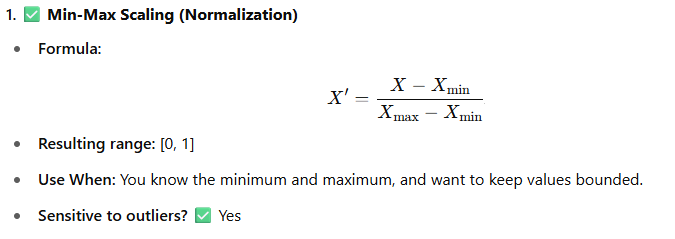
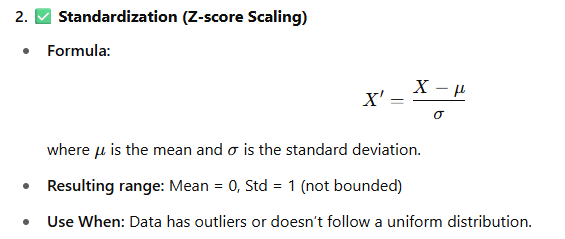

In [ ]:
cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working', 'Make', 'Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary']

In [ ]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [ ]:
Xtrain_scaled_MinMax.head(2)

In [ ]:
X_train.head(2)

In [ ]:
(36-X_val['Age'].min())/(X_val['Age'].max()-X_val['Age'].min())

In [ ]:
Xtrain_scaled_MinMax.describe()

In [ ]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [ ]:
round(Xtrain_scaled_StandardScalar.describe(),2)

In [ ]:
X_train[num_cols].head(2)

In [ ]:
(45- X_train['Age'].mean())/X_train['Age'].std()

In [ ]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols]],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols]],axis=1)

In [ ]:
scaled_train.to_csv('Scaled_data_train')
scaled_test.to_csv('Scaled_data_val')

#### Summary Table of most popular methods;
| Method          | Range    | Affected by Outliers | Use Case                            |
| --------------- | -------- | -------------------- | ----------------------------------- |
| Min-Max Scaling | \[0, 1]  | ✅ Yes                | Image data, bounded values          |
| Standardization | \~N(0,1) | ❌ Less               | Linear models, SVM, Neural Networks |
| Robust Scaling  | Depends  | ❌ No                 | Data with outliers                  |
| MaxAbs Scaling  | \[-1, 1] | ❌ Less               | Sparse data (e.g., NLP features)    |


# 4-Model Building (Regression), Evaluation & Tuning

* Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
* Model Evaluation
    * Regression metrics: MAE, MSE, RMSE, R²
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("bright_automotive_company.csv")
df.dropna(inplace=True)

# Set 'Price' as the regression target
y = df['Price']
X = df.drop('Price', axis=1)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

# Create a single figure for plotting
plt.figure(figsize=(8, 5))

# Train, predict and evaluate each model
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Print performance metrics
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("MSE:", mean_squared_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R² Score:", r2_score(y_test, preds))

    # Scatter plot: Predicted vs True Values for each model
    plt.scatter(y_test, preds, alpha=0.6, label=f'{name} (R² = {r2_score(y_test, preds):.2f})')

# Add the ideal line (where True values = Predicted values)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Line')

# Customize the plot
plt.title('Model Comparison: Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Tuning: GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print("\nBest Params from GridSearchCV (Random Forest):", grid_search.best_params_)

# Tuning: RandomizedSearchCV for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions=param_dist, 
                                   n_iter=10, scoring='r2', cv=3, random_state=42)
random_search.fit(X_train, y_train)
print("\nBest Params from RandomSearchCV (XGBoost):", random_search.best_params_)

# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert target column 'Personal_loan' to binary
df['Personal_loan'] = df['Personal_loan'].map({'Yes': 1, 'No': 0})

# Separate target and features
X = df.drop('Personal_loan', axis=1)
y = df['Personal_loan']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='binary'))
    print("Recall:", recall_score(y_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC & AUC
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        print("AUC Score:", auc)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning Example 1: Random Forest with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)
print("\nBest Params from GridSearchCV (Random Forest):", grid_rf.best_params_)

# Hyperparameter Tuning Example 2: XGBoost with RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
random_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                param_distributions=param_dist_xgb,
                                n_iter=10, scoring='f1', cv=3, random_state=42)
random_xgb.fit(X_train, y_train)
print("\nBest Params from RandomSearchCV (XGBoost):", random_xgb.best_params_)
